In [1]:
import pandas as pd

In [3]:
!ls movielens/ml-20m/

README.txt        genome-tags.csv   movies.csv        tags.csv
genome-scores.csv links.csv         ratings.csv


In [4]:
!mv movielens/ml-20m/*.csv movielens/

In [5]:
!ls movielens/

Icon?             genome-tags.csv   ml-20m            ratings.csv
genome-scores.csv links.csv         movies.csv        tags.csv


In [7]:
!head -5 movielens/movies.csv

In [8]:
!cat movielens/movies.csv | wc -l

   27279


In [9]:
!head -5 movielens/tags.csv

In [10]:
!head -5 movielens/ratings.csv

In [12]:
movies = pd.read_csv('movielens/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [41]:
tags = pd.read_csv('movielens/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [39]:
ratings = pd.read_csv('movielens/ratings.csv', parse_dates='timestamp')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [43]:
del ratings['timestamp']
del tags['timestamp']

In [44]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [24]:
row_0 = tags.iloc[0,]
type(row_0)

pandas.core.series.Series

In [25]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [45]:
ratings['userId'].clip(10, 20).shape

(20000263,)

In [46]:
ratings.shape

(20000263, 3)

In [48]:
ratings['rating'].describe()

count    20000263.000000
mean            3.525529
std             1.051989
min             0.500000
25%             3.000000
50%             3.500000
75%             4.000000
max             5.000000
Name: rating, dtype: float64

In [49]:
ratings['rating'].value_counts()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
dtype: int64

In [50]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [52]:
filter_1 = ratings['rating']>4
filter_1.any()

True

In [55]:
temp = ratings.head().copy()

In [61]:
temp.replace(2, 200,inplace=True)
temp

,userId,movieId,rating
0,1,200,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [62]:
movies.shape

(27278, 3)

In [66]:
print(movies.isnull().any())
print()
print(ratings.isnull().any())
print()
print(tags.isnull().any())

movieId    False
title      False
genres     False
dtype: bool

userId     False
movieId    False
rating     False
dtype: bool

userId     False
movieId    False
tag         True
dtype: bool


In [67]:
tags.isnull().sum()

userId      0
movieId     0
tag        16
dtype: int64

In [68]:
tags = tags.dropna()

In [69]:
tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

### Visualization

In [70]:
%matplotlib inline

In [72]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117db1390>]], dtype=object)

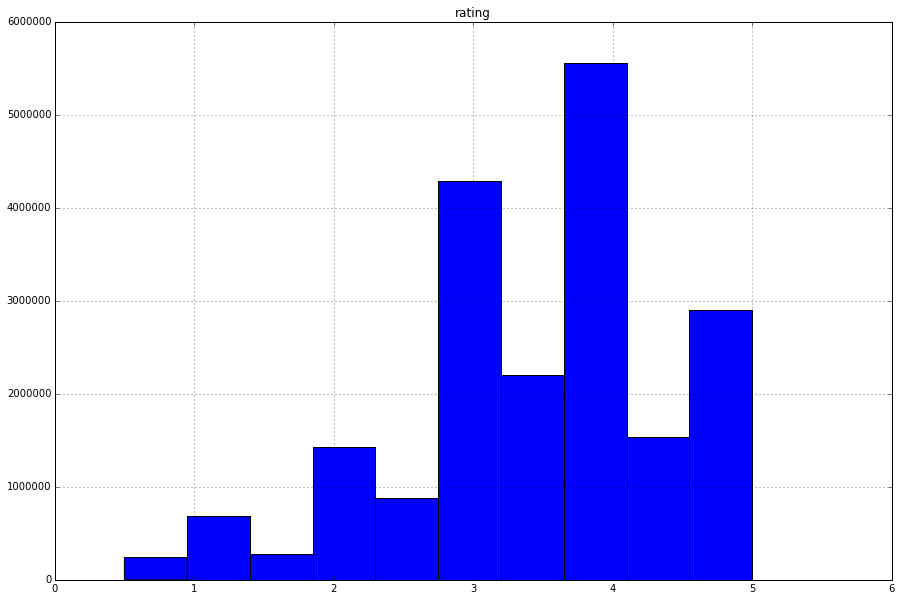

In [74]:
ratings.hist(column='rating', figsize=(15, 10))

/Users/BadWizard/anaconda3/lib/python3.4/site-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


''

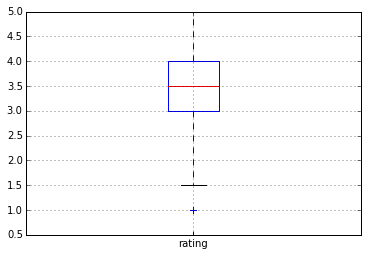

In [76]:
ratings.boxplot(column='rating', figsize=(15, 20))
;